In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import seaborn as sns

# Import submission
sub = pd.read_csv('../submissions/lgbm_v50_0.6848_pp.csv')

# Import probs (before post processing)
probs = np.load('../submissions/lgbm_v50_0.6848_pp_raw.npy')

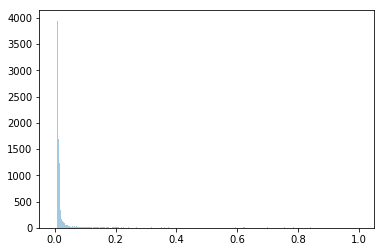

In [2]:
ax = sns.distplot(probs, kde=False, bins=np.linspace(0, 1, 1000))

In [22]:
ixs = np.arange(0, sub.shape[0], 1)
selected_ixs = ixs[np.logical_and(probs > 0.42, probs < 0.53)]
assert selected_ixs.size % 3 == 0

In [23]:
# Import selected test set entries
selected_test = pq.read_pandas('../data/test_parquet/test.parquet', columns=[str(i) for i in 8712+selected_ixs]).to_pandas().values.T

In [30]:
selected_preds = sub['target'].values[selected_ixs]
selected_probs = probs[selected_ixs]

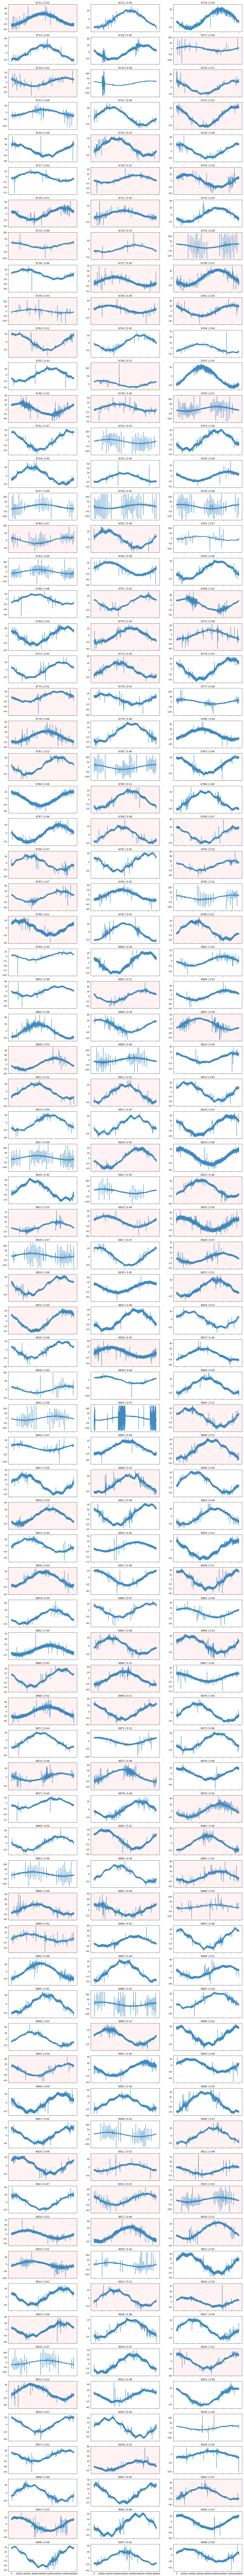

In [32]:
num_sigs = selected_test.shape[0]
samp = 10

f, axs = plt.subplots(int(num_sigs/3), 3, sharex=True, sharey=False, figsize=(7*3, selected_test.shape[0]))

facecolors = [(1, 1, 1), (1, 0.95, 0.95)]
t = np.arange(0, 800000, samp)

for k, (signal, pred, prob) in enumerate(zip(selected_test, selected_preds, selected_probs)):
    
    x, y = np.floor(k/3).astype(int), int(k % 3)
    
    axs[x, y].plot(t, signal[::samp], alpha=0.85)
    axs[x, y].set_facecolor(facecolors[pred])
    sig_id = 8712 + k
    axs[x, y].set_title(f'{sig_id:d} | {prob:.2f}')